In [ ]:
%%capture
from google.colab import drive 
from importlib import reload

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7jsXcuWE3PxwjtVFf2GNBS8AcLLbD7PKFedOnnM7ywA5_LmDPhOiU


In [ ]:
!pip install -U git+https://github.com/albu/albumentations
!pip install tensorflow=="2.1.0"

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-90g7sr6m
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-90g7sr6m
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=d56131967eb2171b734017bcb26384e96112284bc6609f30a19a6ec93a0119d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-li5aq57d/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 42.5MB/s 
     |████████████████████████████████| 450kB 54.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=0181347f7ea5adaf9478c82d737b4cf2055f75cc75239b

In [ ]:
 import tensorflow as tf
(print(tf.__version__))

2.1.0


In [ ]:
#Change to the google drive main
%cd "gdrive/My Drive"

#Create a new directory
#!mkdir field-delineation

#Enter the new directory
%cd field-delineation

#make a dir for the data
#!mkdir Data
#!mkdir Data/Training
#make an output dir
#!mkdir Outputs

/content/gdrive/My Drive
/content/gdrive/My Drive/field-delineation


In [ ]:
%cd field-delineation

/content/gdrive/My Drive/field-delineation/field-delineation


In [ ]:
%%capture
!pip install boto3
!pip install fs
!pip install rasterio
!pip install numpy
!pip install pandas
!pip install shapely
!pip install geopandas>=0.8.1
!pip install tqdm
!pip install python-dateutil
!pip install sentinelhub
!pip install tqdm
!pip install wandb
!pip install s2cloudless
!pip install dataclasses
!pip install pyproj
!pip install psycopg2
!pip install scipy
!pip install scikit-image
!pip install setuptools
!pip install matplotlib
!pip install scikit-learn
!pip install lxml
!pip install pandarallel

In [ ]:
%%capture
!git clone https://github.com/sentinel-hub/eo-flow

In [ ]:
%%capture
!python setup.py install --user

In [ ]:
print(tf.__version__)
!pip install tensorflow-addons=='0.9.1'

2.1.0
     |████████████████████████████████| 1.0MB 3.0MB/s 


In [ ]:
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import sys
sys.path.insert(0, './eo-flow')

from pathlib import Path
from typing import Callable, List, Any

import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from eoflow.models.segmentation_base import segmentation_metrics
from eoflow.models.losses import JaccardDistanceLoss, TanimotoDistanceLoss

import rasterio

In [ ]:
from eoflow.models.segmentation_unets import ResUnetA
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip "/content/gdrive/My Drive/field-delineation/Data/TrainingDataV1.zip" -d "/content"

Archive:  /content/gdrive/My Drive/field-delineation/Data/TrainingDataV1.zip
   creating: /content/TrainingDataV1/
   creating: /content/TrainingDataV1/boundaries/
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202003.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202004.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202005.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202006.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202007.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UMG_202008.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202003.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202004.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202005.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202006.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202007.tif  
  inflating: /content/TrainingDataV1/boundaries/S2_32UNG_202008.ti

In [ ]:
import cv2
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, HueSaturationValue,
    RandomBrightnessContrast
)
from glob import glob

In [ ]:
from skimage.io import imread
import os
from glob import glob
from random import shuffle
import numpy as np

In [ ]:
AUGMENTATIONS = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])

In [ ]:
from random import randrange

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, trainPath, augmentations, batch_size=6, patch_size=256):
      self.image_path = glob(trainPath + '/images/*.tif')
      self.extent_path = glob(trainPath + '/extents/*.tif')
      self.boundary_path = glob(trainPath + '/boundaries/*.tif')
      self.distance_path = glob(trainPath + '/distances/*.tif')
      self.batch_size = batch_size
      self.patch_size = patch_size
      self.transform = augmentations

      # Preprocess
      self.mean_ =  np.array([[[ 231.23175052,326.977749,359.47592888,1261.01501689]]])
      self.std_ = np.array([[[ 269.11238397,353.12374842,414.48604569,1231.90023677]]])

      # Create empty image containers
      self.ximage = np.zeros(shape = (batch_size, 256, 256, 4), dtype = np.float32)
      self.xextend = np.zeros(shape = (batch_size, 256, 256, 2), dtype = np.float32)
      self.xbound = np.zeros(shape = (batch_size, 256, 256, 2), dtype = np.float32)
      self.xdist = np.zeros(shape = (batch_size, 256, 256, 2), dtype = np.float32)

      # Size
      self.length = len(self.image_path) * 2000
      self.current_index = 0
      self.n_images = 0

      #Load the images
      self.load_initial(self.image_path, self.extent_path, self.boundary_path, self.distance_path)
    
    def load_initial (self, image_path, extent_path, boundary_path, distance_path):

      if self.current_index >= len(self.image_path):
        return

      # Load initial set of images
      self.image = self.__get_image(self.image_path[self.current_index])
      self.extent = self.__get_image(self.extent_path[self.current_index])
      self.boundary = self.__get_image(self.boundary_path[self.current_index])
      self.distance = self.__get_image(self.distance_path[self.current_index])
      self.normalize()
    
    def normalize(self):
      self.image = (self.image - self.mean_) / self.std_
      
    def __len__(self): 
      return (self.length // self.batch_size)

    def __get_image(self, imagepath):
      image_arr = imread(imagepath)
      return image_arr

    def __getitem__(self, index):
      self.n_images += self.batch_size
      if self.n_images > 2000:
        self.current_index += 1
        self.n_images = 0
        self.load_initial(self.image_path, self.extent_path, self.boundary_path, self.distance_path)

      X, Y = self.__get_data()
      return X, Y

    def on_epoch_end(self):
      self.length = len(self.image_path) * 2000
      self.current_index = 0
      self.n_images = 0
      self.load_initial(self.image_path, self.extent_path, self.boundary_path, self.distance_path)

    def __get_data(self):
      i = 0
      row, col, ch = self.image.shape
      while i < self.batch_size:
        upper_left_x = randrange(0, row - self.patch_size - 1)
        upper_left_y = randrange(0, col - self.patch_size - 1)
        crop = [upper_left_x,
                         upper_left_y,
                         upper_left_x + self.patch_size,
                         upper_left_y + self.patch_size]
        
        temp_img = self.image[crop[0]:crop[2],crop[1]:crop[3],:]
        if(np.var(temp_img)>0.5):


          # Generate Image
          self.ximage[i] = temp_img

          # Generate extent
          extent = self.extent[crop[0]:crop[2],crop[1]:crop[3]]
          extent_ = 1 - extent
          self.xextend[i] = np.dstack((extent, extent_))

          # Generate boundary
          boundary = self.boundary[crop[0]:crop[2],crop[1]:crop[3]]
          boundary_ = 1 - boundary
          self.xbound[i] = np.dstack((boundary, boundary_))

          #Generate distance
          distance = self.distance[crop[0]:crop[2],crop[1]:crop[3]]
          distance_ = 1 - distance
          self.xdist[i]  = np.dstack((distance, distance_))


          transformed = self.transform(image=self.ximage[i], masks=[self.xextend[i], self.xbound[i], self.xdist[i]])
          self.ximage[i] = transformed['image']
          self.xextend[i] = transformed['masks'][0]
          self.xbound[i] = transformed['masks'][1]
          self.xdist[i] = transformed['masks'][2]

          i+=1

      return self.ximage, [self.xextend, self.xbound, self.xdist]

In [ ]:
train_path = '/content/TrainingDataV1'
train_gen = DataGenerator(train_path,augmentations=AUGMENTATIONS)
train_gen.__len__()

8000

In [ ]:
for X,y in train_gen:
  print(X.shape,y[0].shape,y[1].shape)
  break

(6, 256, 256, 4) (6, 256, 256, 2) (6, 256, 256, 2)


In [ ]:
n_classes = 2
model_config={
        'learning_rate': 0.0001,
        'n_layers': 3,
        'n_classes': 2,
        'keep_prob': 0.8,
        'features_root': 32,
        'conv_size': 3,
        'conv_stride': 1,
        'dilation_rate': [1, 3, 15, 31],
        'deconv_size': 2,
        'add_dropout': True,
        'add_batch_norm': False,
        'use_bias': False,
        'bias_init': 0.0,
        'padding': 'SAME',
        'pool_size': 3,
        'pool_stride': 2,
        'prediction_visualization': True,
        'class_weights': None
}

training_config = {
    'input_shape': (256, 256, 4),
    'n_classes': n_classes,
    'batch_size': 6,
    'num_epochs': 25,
    'model_name': 'field-delineation'
}

wandb_config =  dict(model_config, 
                     num_epochs=training_config['num_epochs'], 
                     batch_size=training_config['batch_size'],
                     model_name=training_config['model_name'])


In [ ]:
from eoflow.models.metrics import MCCMetric
mcc_metric = MCCMetric(default_n_classes=2, default_threshold=.5)
mcc_metric.init_from_config({'n_classes': 2})

model = ResUnetA(model_config)
model.build(dict(features=[None] + list(training_config['input_shape'])))


model.net.compile(
        loss={'extent':'mse',
              'boundary':'mse',
              'distance':'mse'},
        optimizer='adam',
        metrics=[segmentation_metrics['accuracy'](), tf.keras.metrics.MeanIoU(num_classes=training_config['n_classes'])])


Using default value for threshold: 0.5.


In [ ]:
model.net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
features (InputLayer)           [(None, 256, 256, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 256         features[0][0]                   
__________________________________________________________________________________________________
res_conv2d (ResConv2D)          (None, 256, 256, 32) 73728       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 128, 128, 64) 18432       res_conv2d[0][0]                 
______________________________________________________________________________________________

In [ ]:
!unzip  "/content/gdrive/My Drive/field-delineation/Data/ValidationData.zip" -d "/content"

Archive:  /content/gdrive/My Drive/field-delineation/Data/ValidationData.zip
   creating: /content/ValidationData/
   creating: /content/ValidationData/boundary/
  inflating: /content/ValidationData/boundary/S2_32VNH_202003_boundary.tif  
  inflating: /content/ValidationData/boundary/S2_32VNH_202004_boundary.tif  
  inflating: /content/ValidationData/boundary/S2_32VNH_202005_boundary.tif  
  inflating: /content/ValidationData/boundary/S2_32VNH_202008_boundary.tif  
   creating: /content/ValidationData/distance/
  inflating: /content/ValidationData/distance/S2_32VNH_202003_distance.tif  
  inflating: /content/ValidationData/distance/S2_32VNH_202004_distance.tif  
  inflating: /content/ValidationData/distance/S2_32VNH_202005_distance.tif  
  inflating: /content/ValidationData/distance/S2_32VNH_202006_distance.tif  
  inflating: /content/ValidationData/distance/S2_32VNH_202007_distance.tif  
  inflating: /content/ValidationData/distance/S2_32VNH_202008_distance.tif  
   creating: /content

In [ ]:
train_path = '/content/TrainingDataV1'
train_gen = DataGenerator(train_path,augmentations=AUGMENTATIONS)

In [ ]:
val_path= '/content/ValidationData/'
val_gen = DataGenerator(val_path,augmentations=AUGMENTATIONS)

In [ ]:
val_gen.__len__()

2000

In [ ]:
train_gen.__len__()

8000

In [ ]:
print(train_gen.__len__())
print(val_gen.__len__())

8000
2000


In [ ]:
checkpoint_filepath = '/content/gdrive/My Drive/field-delineation/checkpoint_dir/' + "Model_6_7" + ".hdf5" 
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,save_freq='epoch',save_weights_only=True)

In [ ]:
n_model = model.net.fit(train_gen,validation_data=val_gen,epochs = 50,callbacks=[model_checkpoint_callback])

In [ ]:
wandb.init(config=wandb_config, name=training_config['model_name'], project="field-delineation")

In [ ]:
callbacks_ = [model_checkpoint_callback] + [WandbCallback()]
callbacks_ 

In [ ]:
n_model = model.net.fit(train_gen,validation_data=val_gen,epochs = 20,callbacks=callbacks_)

In [ ]:
n_model = model.net.fit(train_gen,validation_data=val_gen,epochs = 45,callbacks=callbacks_)

Train for 8000 steps, validate for 2000 steps
Epoch 1/45
7750/8000 [============================>.] - ETA: 2:45 - loss: 0.2092 - extent_loss: 0.1150 - boundary_loss: 0.0916 - distance_loss: 0.0026 - extent_accuracy: 0.8429 - extent_mean_io_u: 0.2502 - boundary_accuracy: 0.8793 - boundary_mean_io_u: 0.2506 - distance_accuracy: 0.9989 - distance_mean_io_u: 0.4467

In [ ]:
final_path = '/content/gdrive/My Drive/field-delineation/checkpoint_dir/' + "Model_16_final" + ".h5" 
model.net.save(final_path)

In [ ]:
weights_path = '/content/gdrive/My Drive/field-delineation/checkpoint_dir/' + "Model_2" + ".hdf5" 
new_model.net.load_weights(weights_path)

In [ ]:
testPath = "./Data/TestData.zip"
!unzip "/content/gdrive/My Drive/field-delineation/Data/TestData.zip" -d "/content"

Archive:  /content/gdrive/My Drive/field-delineation/Data/TestData.zip
   creating: /content/TestData/
   creating: /content/TestData/boundaries/
   creating: /content/TestData/boundaries/S2_32VNJ/
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202003.tif  
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202004.tif  
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202005.tif  
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202006.tif  
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202007.tif  
  inflating: /content/TestData/boundaries/S2_32VNJ/S2_32VNJ_202008.tif  
   creating: /content/TestData/distances/
   creating: /content/TestData/distances/S2_32VNJ/
  inflating: /content/TestData/distances/S2_32VNJ/S2_32VNJ_202003.tif  
  inflating: /content/TestData/distances/S2_32VNJ/S2_32VNJ_202004.tif  
  inflating: /content/TestData/distances/S2_32VNJ/S2_32VNJ_202005.tif  
  inflating: /content/TestData/distances/S2_32VNJ/S2_32

In [ ]:
test_path = '/content/TestData/'
test_gen = DataGenerator(test_path,augmentations=AUGMENTATIONS)

In [ ]:
test_gen.__len__()

2000

In [ ]:
test_img = []
test_lbl = []

for x, y in test_gen_:
  # Remove the first axis
  x = np.array(x[0])

  # Ge variance
  variance = np.var(x)

  if variance > 0.7:
    test_img.append(x)
    test_lbl.append(y)
    print(variance)

  if len(test_img) == 50:
    break

0.99671245
2.637998
0.8617667
1.2194487
1.0303494
0.92984587
1.6080006
0.78400105
1.0450505
1.3490638
1.2952706
1.3058014
1.4069698
2.69006
0.8199938
1.0336186
2.0170457
1.8397642
0.7597609
0.8853295
0.72238934
0.87259364
1.4014077
1.216971
1.0133148
0.88301206
0.8866005
1.7175722
1.377651
0.7180938
0.9305672
0.94435465
1.0955483
1.7955472
1.8985677
1.2190585
1.092673
1.0283574
2.2610111
0.9533046
1.0615063
1.0227332
0.70132285
1.1116776
0.7491943
1.2622318
1.2119089
2.7914965
1.2417936
0.930295


In [ ]:
for val in test_img:

  variance = np.var(val)
  print(variance)


0.99671245
2.637998
0.8617667
1.2194487
1.0303494
0.92984587
1.6080006
0.78400105
1.0450505
1.3490638
1.2952706
1.3058014
1.4069698
2.69006
0.8199938
1.0336186
2.0170457
1.8397642
0.7597609
0.8853295
0.72238934
0.87259364
1.4014077
1.216971
1.0133148
0.88301206
0.8866005
1.7175722
1.377651
0.7180938
0.9305672
0.94435465
1.0955483
1.7955472
1.8985677
1.2190585
1.092673
1.0283574
2.2610111
0.9533046
1.0615063
1.0227332
0.70132285
1.1116776
0.7491943
1.2622318
1.2119089
2.7914965
1.2417936
0.930295


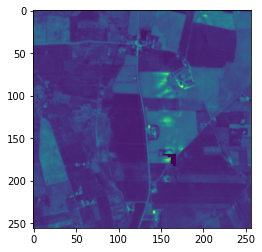

In [ ]:
show(X[4][:,:,0])

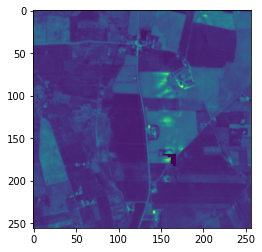

In [ ]:
show(X[1][:,:,0])

In [ ]:
X_ = np.stack(test_img)
print(X_.shape)
Y_ = [np.stack([test_lbl[i][0] for i in range(20)]), np.stack([test_lbl[i][1] for i in range(20)]), np.stack([test_lbl[i][2] for i in range(20)])]
len(Y_)

(50, 256, 256, 4)


3

In [ ]:
(X_[3].shape)

(256, 256, 4)

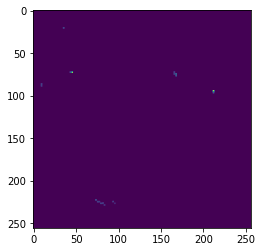